In [1]:
%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
path = os.path.abspath("")
dirname, filename = os.path.split(path)
sys.path.append(dirname+"/scripts")
sys.path.append(dirname)

In [3]:
from model_functions import Run
from keras.models import load_model
import show_preds

In [4]:
model = load_model(dirname+"/ALnet-3.0.h5")
model = Run(model)

2022-02-01 08:55:52.377673: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
results = model.predict_folder(f"{dirname}/digits")
#results is a dictionary, each key the filename of an img,

In [6]:
def wrong_predictions(results):
    wrongs = {}
    for i in results.keys():
        if int(i[0]) != results[i]["classname"]:
            wrongs[i]=results[i]
    return wrongs
            

In [7]:
x = wrong_predictions(results)

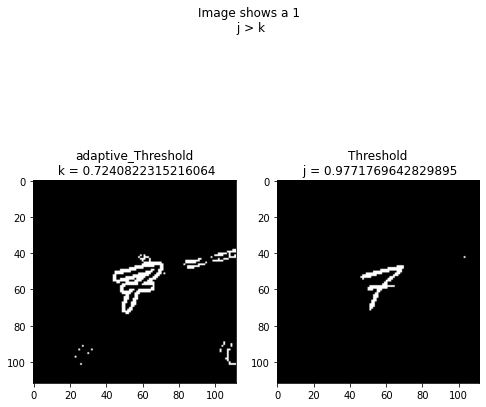

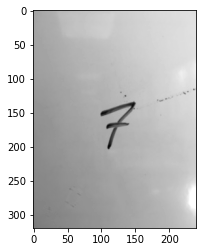

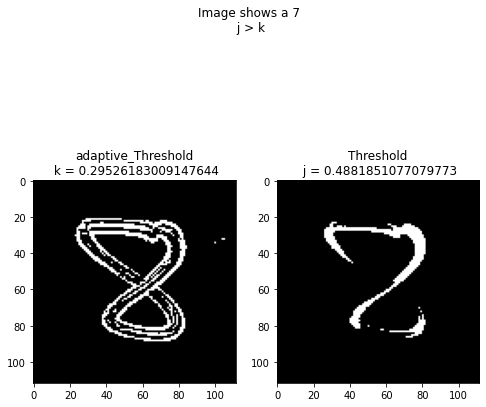

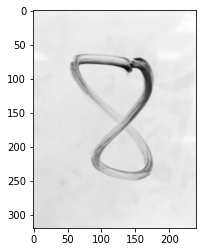

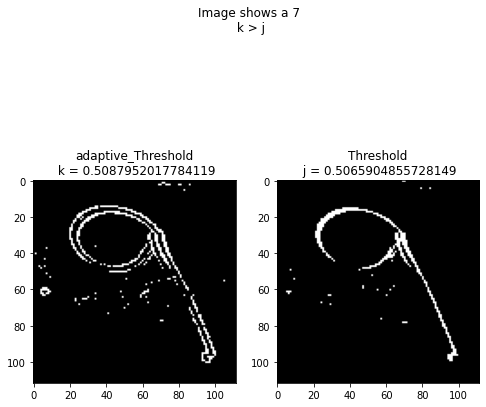

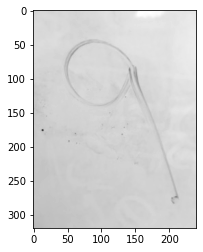

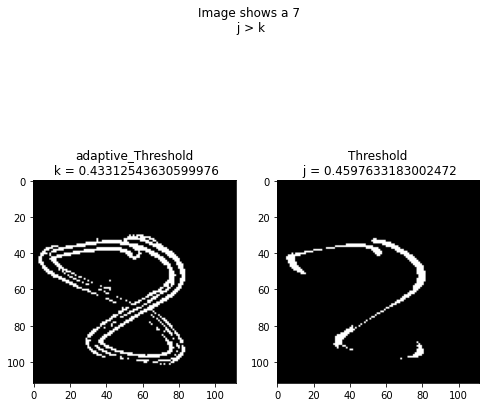

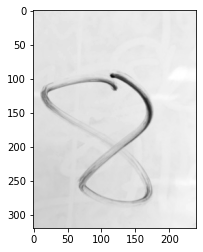

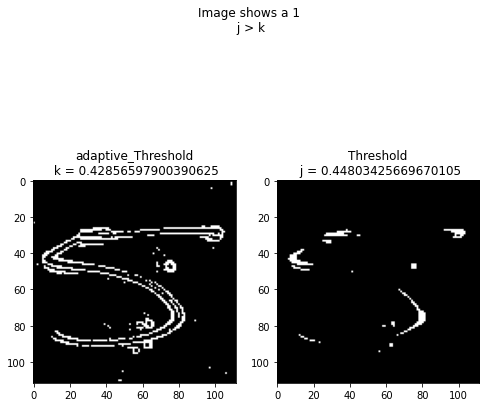

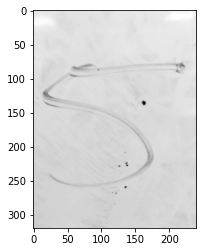

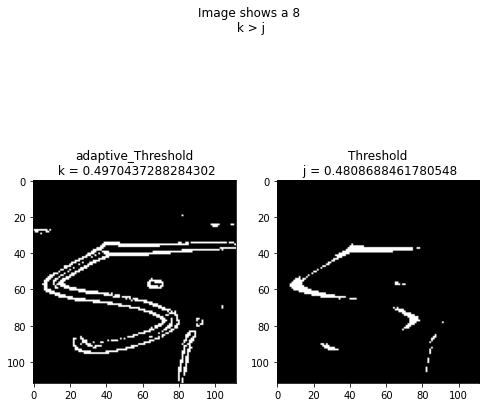

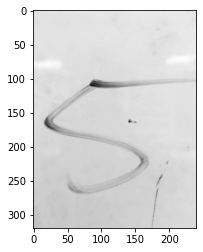

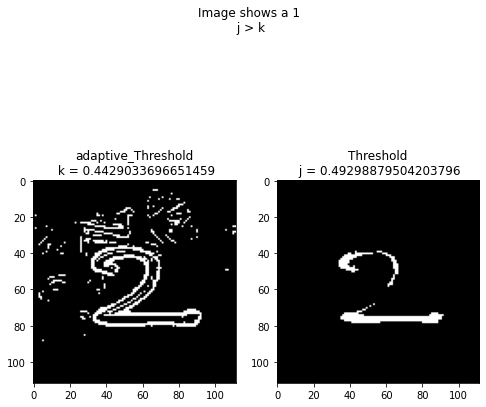

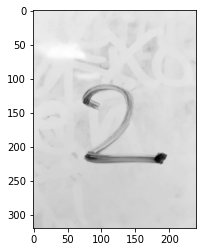

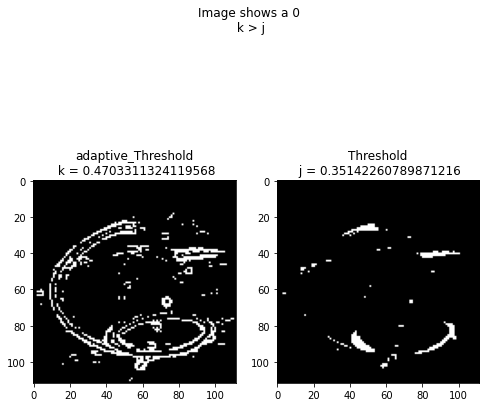

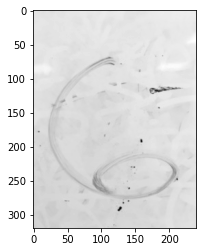

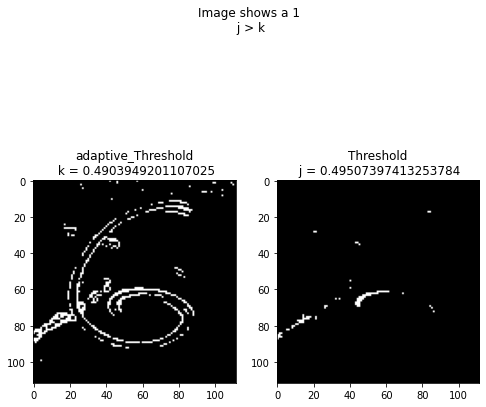

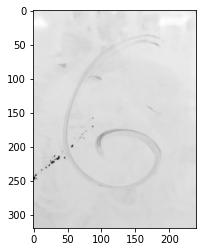

In [8]:
# visualising wrongly classified images
for i in x:
    model.plot_comparison(x[i])
    img = cv2.imread(f"{dirname}/digits/{i}", 0)
    plt.imshow(img)
    plt.show()